# Week6 Lab

## Download & Extract Data

Programmatically download the zip file & extract

In [8]:
from zipfile import ZipFile
from urllib import request


file_url = 'https://github.com/msaricaumbc/DS601_Fall21/raw/main/Week06/data/lab_data.zip'
file_name = 'data.zip'


def download_file(file_name, url):
    res = request.urlopen(url)
    with open(file_name,'wb') as file:
        file.write(res.read())

download_file(file_name, file_url)

In [9]:
def unzip(file_name, path='./'):
    # opening the zip file in READ mode 
    with ZipFile(file_name, 'r') as zip: 
        # printing all the contents of the zip file 
        zip.printdir() 

        # extracting all the files 
        print('Extracting all the files now...') 
        zip.extractall(path = path) 
        print('Done!') 

In [10]:
unzip(file_name)

File Name                                             Modified             Size
PoliceShootingsUS.csv                          2021-09-21 20:53:54       227653
__MACOSX/._PoliceShootingsUS.csv               2021-09-21 20:53:54          276
volunteers.txt                                 2021-10-06 00:32:28         7015
__MACOSX/._volunteers.txt                      2021-10-06 00:32:28          176
Extracting all the files now...
Done!


In [11]:
!ls

PoliceShootingsUS.csv data.zip              week06_lab.ipynb
__MACOSX              volunteers.txt


In [12]:
import pandas as pd

df=pd.read_csv('PoliceShootingsUS.csv',encoding='cp1252')

In [13]:
df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.0,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.0,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True


## Reading data from a csv file

For the file `PoliceShootingsUS.csv`, please answer the following questions:

* How many offenders are older than 55? 

In [16]:
## Your code is here
num=len(df[df.age >55])
           
print('Number of offenders older than 55 : ', num)

Number of offenders older than 55 :  235


* What's the age distribution?

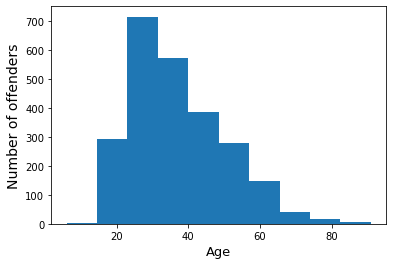

<Figure size 432x288 with 0 Axes>

In [19]:
## Your code is here
import matplotlib.pyplot as plt

plt.hist(df['age'])
plt.xlabel('Age',fontsize =13)
plt.ylabel('Number of offenders',fontsize =14)
plt.show()
plt.tight_layout()

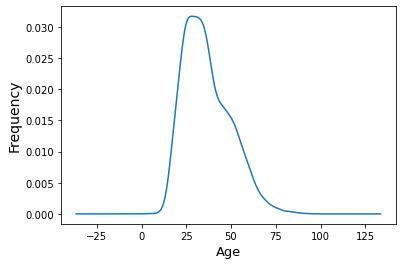

<Figure size 432x288 with 0 Axes>

In [21]:
df.age.plot(kind='kde')
plt.xlabel('Age',fontsize =13)
plt.ylabel('Frequency',fontsize =14)
plt.show()
plt.tight_layout()

## Dirty data

Read `volunteers.txt` file and perform the following action:

* Create a dataframe with columns: Name, Lastname, State

In [22]:
## Your code is here
names=[]
lastnames=[]
states=[]

with open ('volunteers.txt','r') as my_file:
    lines=my_file.readlines()
    for line in lines:
        
        line= line \
            .replace("[",',')\
            .replace("]",',')\
            .replace("(",',')\
            .replace(")",',')\
            .replace("-",',')\
          
        parts = line.split(',')
        
        lastname = parts[1].strip()
        name  = parts[2].strip()
        state = parts[4].strip()
        
        lastnames.append(lastname)
        names.append(name)
        states.append(state)
        
df= pd.DataFrame()
df['Name']=names
df['Lastname']=lastnames
df['State']=states
    

In [23]:
df

,Name,Lastname,State
0,Christine,Harding,Virginia
1,Kimberly,Davis,New York
2,Rachel,Ingram,Louisiana
3,Richard,Walker,Oregon
4,Francisco,Barnes,Virginia
...,...,...,...
95,Kevin,Smith,North Dakota
96,Mark,Moore,Alaska
97,Jennifer,Landry,Wyoming
98,Lori,Phillips,Arkansas
